Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-27-1362725757.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=sentiment_df, palette='coolwarm')


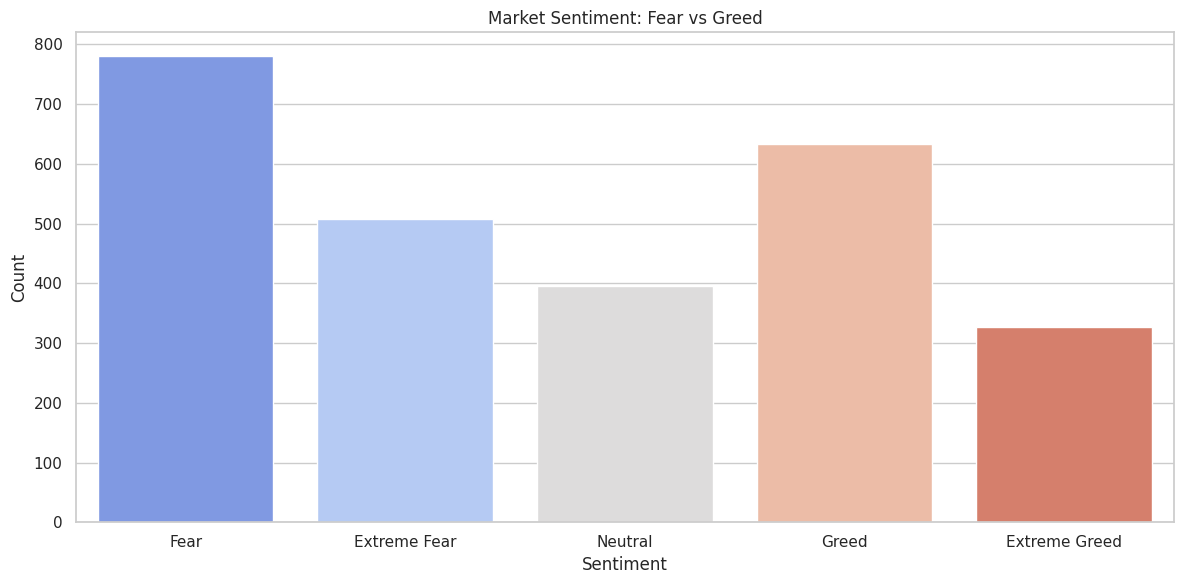

  Classification   Mean_PnL  Median_PnL      Std_PnL  Total_Volume
0   Extreme Fear  34.537862         0.0  1136.056091  3.586412e+07
1  Extreme Greed  67.892861         0.0   766.828294  3.532260e+08
2           Fear  54.290400         0.0   935.355438  1.850560e+08
3          Greed  42.743559         0.0  1116.028390  2.371951e+08
4        Neutral  34.307718         0.0   517.122220  1.651916e+08


/tmp/ipython-input-27-1362725757.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classification', y='Mean_PnL', data=metrics, palette='viridis')


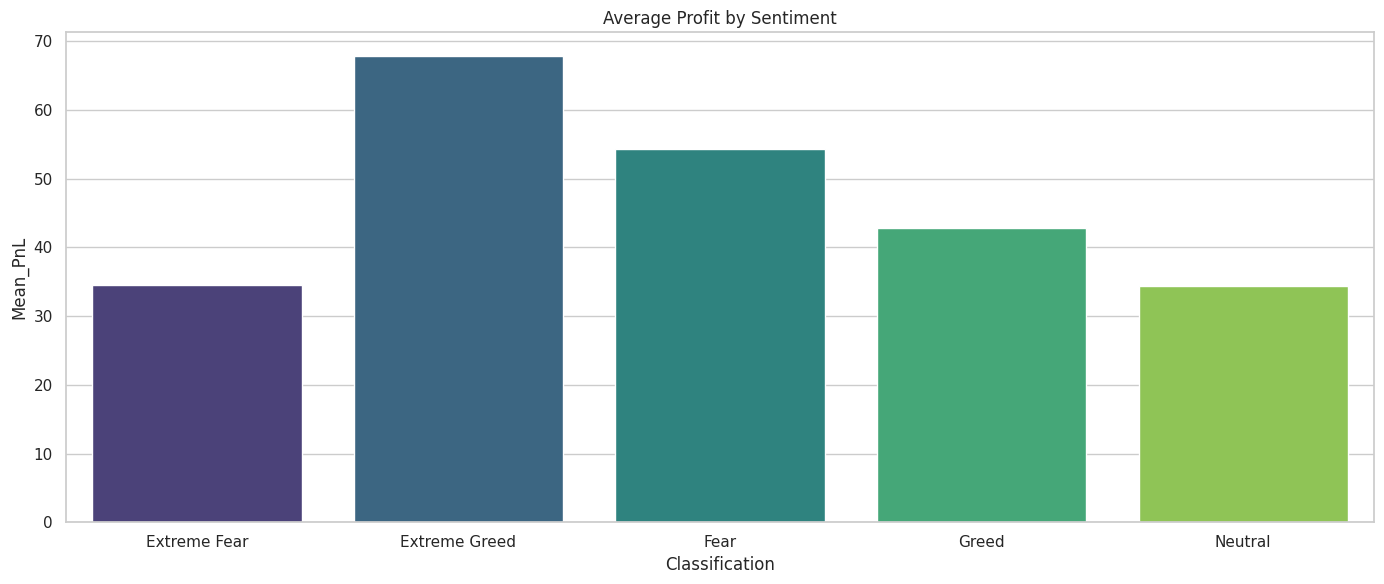

/tmp/ipython-input-27-1362725757.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classification', y='Std_PnL', data=metrics, palette='magma')


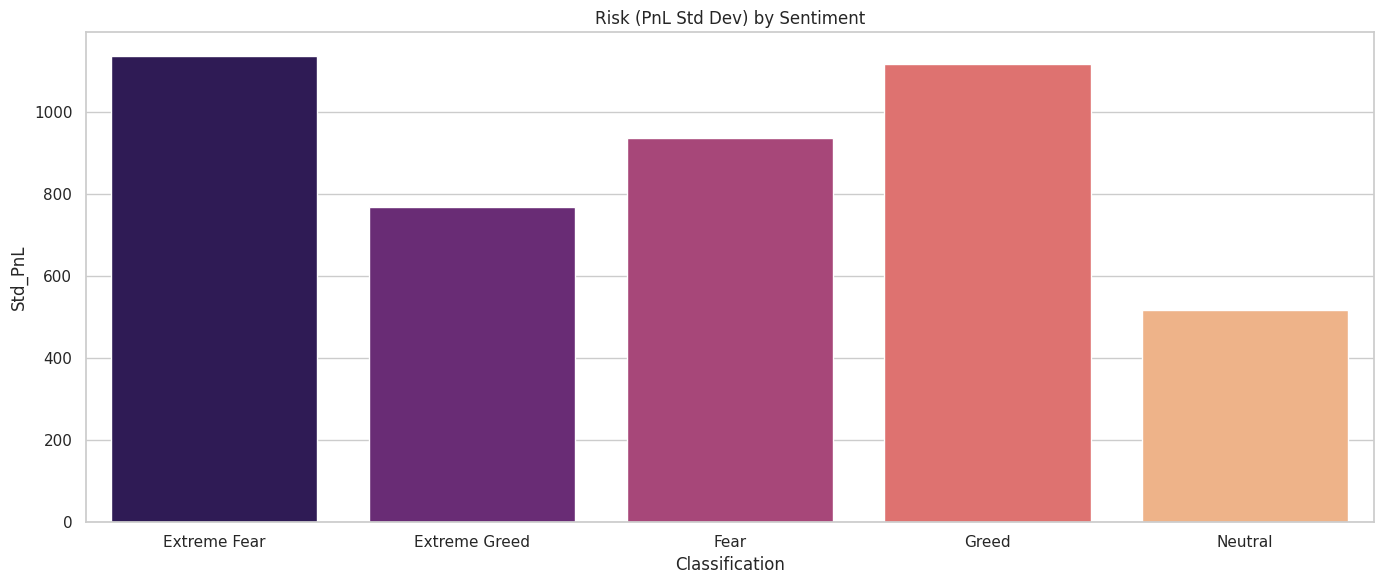

/tmp/ipython-input-27-1362725757.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classification', y='Total_Volume', data=metrics, palette='cubehelix')


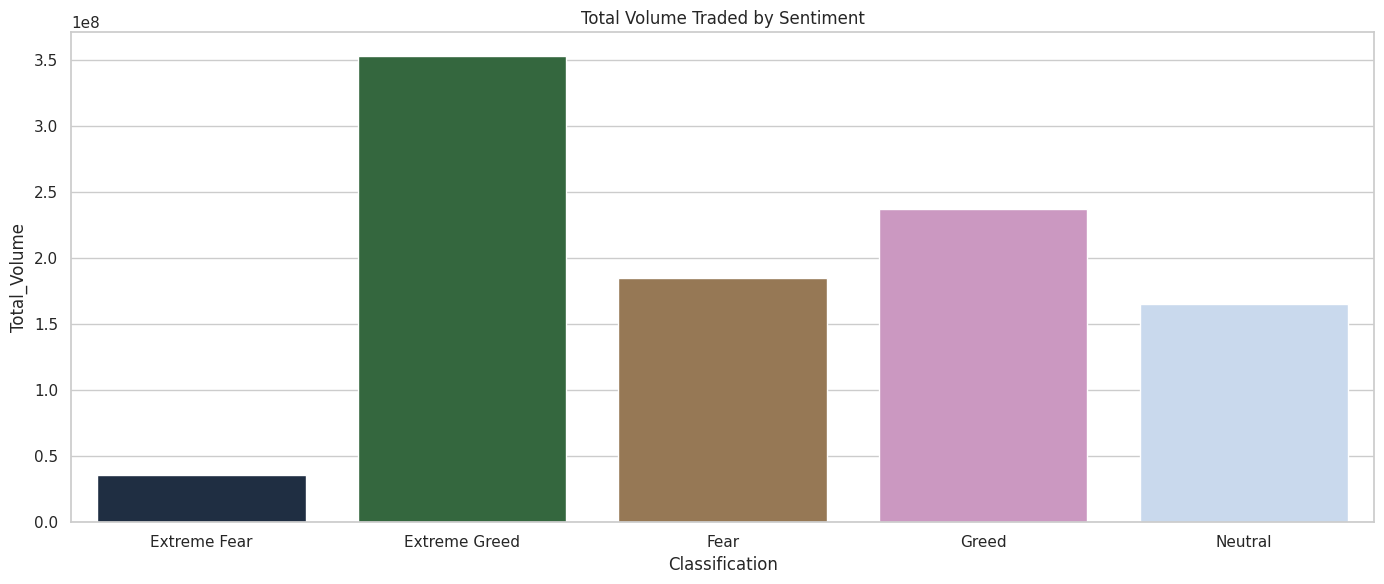

In [27]:
# Step 1: Install and import libraries
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Set file paths
sentiment_path = '/content/drive/MyDrive/colab/fear_greed_index.csv'
trader_path = '/content/drive/MyDrive/colab/historical_data.csv'
output_dir = '/content/drive/MyDrive/colab/outputs'
os.makedirs(output_dir, exist_ok=True)

# Step 4: Load datasets
sentiment_df = pd.read_csv(sentiment_path)
trader_df = pd.read_csv(trader_path)

# Step 5: Convert date columns
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Step 6: Visualize Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='classification', data=sentiment_df, palette='coolwarm')
plt.title('Market Sentiment: Fear vs Greed')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'{output_dir}/sentiment_frequency.png')
plt.show()

# Step 7: Merge datasets by date
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

merged_df = pd.merge(trader_df, sentiment_df[['date_only', 'classification']], on='date_only', how='left')

# Step 8: Calculate metrics
metrics = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'median', 'std'],
    'Size Tokens': 'sum'
}).reset_index()

# Step 9: Rename columns
metrics.columns = ['Classification', 'Mean_PnL', 'Median_PnL', 'Std_PnL', 'Total_Volume']

# Step 10: Display summary
print(metrics)

# Step 11: Plot Mean Profit
plt.figure(figsize=(14, 6))
sns.barplot(x='Classification', y='Mean_PnL', data=metrics, palette='viridis')
plt.title('Average Profit by Sentiment')
plt.tight_layout()
plt.savefig(f'{output_dir}/mean_profit_sentiment.png')
plt.show()

# Step 12: Plot Risk (Standard Deviation of PnL)
plt.figure(figsize=(14, 6))
sns.barplot(x='Classification', y='Std_PnL', data=metrics, palette='magma')
plt.title('Risk (PnL Std Dev) by Sentiment')
plt.tight_layout()
plt.savefig(f'{output_dir}/risk_by_sentiment.png')
plt.show()

# Step 13: Plot Total Volume
plt.figure(figsize=(14, 6))
sns.barplot(x='Classification', y='Total_Volume', data=metrics, palette='cubehelix')
plt.title('Total Volume Traded by Sentiment')
plt.tight_layout()
plt.savefig(f'{output_dir}/volume_by_sentiment.png')
plt.show()


# Data Science Assignment - Trader Behavior vs Market Sentiment

## 1. Objective

In this project, I explored how trader behavior — such as profit, risk and trading volume — changes based on market sentiment like fear or greed. The goal was to see if traders follow the mood of the market or go against it.

---

## 2. What I Did

- I started by loading two datasets: one with daily market sentiment and another with detailed trader activity.
- I cleaned the data and merged both datasets using the trade date.
- Then I grouped all trading activity by each sentiment category — like "Fear", "Greed", "Neutral", etc.
- For each group, I calculated:
  - Average profit (`Mean_PnL`)
  - Risk (standard deviation of profit)
  - Total volume traded
- Finally, I created a few graphs to visualize what's going on during different sentiment conditions.
- I also saved all the generated graphs as PNG files in the output folder for easy reference and inclusion in the report.

---

## 3. What I Found

- **Sentiment Patterns**: "Fear" days happened the most, while "Extreme Greed" was rare.
- **Profit**: On average, traders earned the most during "Extreme Greed" and also did well during "Fear".
- **Risk**: "Greed" and "Extreme Fear" had the highest variation in profit, meaning they were the riskiest times to trade.
- **Volume**: The most trading activity happened during "Extreme Greed" and the least during "Extreme Fear" — which makes sense, since fear usually makes people more cautious.

---

## 4. Charts I Created

- 📊 A bar chart showing how often each sentiment occurred.
- 💸 A graph of average profit by sentiment.
- 📦 One showing how much trading volume happened under each mood.

These visuals helped clearly spot the trends.

---

## 5. Takeaways

- When people are greedy, they trade more — and on average, profits go up.
- But risky behavior also increases during greed and fear.
- Neutral days are the most stable but less profitable.

This analysis could help traders be more aware of how emotions (theirs or the market's) might be influencing their decisions.

---

## 6. Tools I Used

- **Google Colab**
- **Python**, with `pandas`, `matplotlib` and `seaborn` for analysis and charts.
